In [71]:
import pandas as pd

In [72]:
import random

## Generating 1Month Random Data

In [73]:
voltage= []
current= []
powerFactor = []
frequency =[]

In [74]:
for x in range(0,2592000):
    v=random.uniform(220.0800,249.53)
    voltage.append(v)
    i=random.uniform(0.59,4.08)
    current.append(i)
    f = random.uniform(49.98,50.10)
    frequency.append(f)
    p = random.uniform(0.691161,1)
    powerFactor.append(p)

copy the data for three phase.... also add device id,time stamp and power parameters caculations as columns.

In [75]:
v=pd.Series(voltage)

In [76]:
i=pd.Series(current)

In [77]:
p=pd.Series(powerFactor)

In [78]:
f=pd.Series(frequency)

In [79]:
df=pd.DataFrame({'Voltage':v,'Current':i,'PowerFactor':p,'Frequency':f})

In [80]:
df

,Voltage,Current,PowerFactor,Frequency
0,248.973375,2.157460,0.913233,50.031188
1,235.755307,2.469515,0.748440,50.055986
2,220.752263,3.010658,0.920311,50.017341
3,220.949793,3.623443,0.708508,50.025286
4,233.129469,1.164563,0.732329,50.014374
...,...,...,...,...
2591995,230.704925,2.305251,0.880852,50.007432
2591996,226.391511,3.230445,0.959424,50.072852
2591997,244.435021,3.953045,0.781855,50.071010
2591998,234.565065,1.116433,0.794650,50.092468


## Can add this function to previous library and import reducing it to one line 

In [81]:
def table_data(df_test):
    name = df_test.name
    sec_series = df[name]
    m_temp_list=[]
    h_temp_list=[]
    d_temp_list=[]
    #sec_series.values.tolist()
    print(f'Total number of seconds data: {len(sec_series)}')
    mins_series=pd.Series([],dtype='float64')
    hrs_series=pd.Series([],dtype='float64')
    day_series=pd.Series([],dtype='float64')
    sec_series.plot()
    for x in ['m','h','d']:
        if x=='m':
            test_series=sec_series
        elif x=='h':
            test_series=m_temp_list
        elif x== 'd':
            test_series=h_temp_list
        
        if (x=='m')or(x=='h'):
            div=60
        elif x=='d':
            div=24
            
        count=0
        acc=0
        temp_list=[]
        for y in test_series:
            count += 1
            acc += y
            if (count==div):
                acc = acc/div
                temp_list.append(acc)
                count = 0
                acc = 0        
        if (count<div and count>0):
            acc = acc/count
            temp_list.append(acc)
        count=0
        acc=0 
        if (x=='m'):
            #m_temp_list=[]
            m_temp_list=temp_list[:]
            print(f'Total number of minutes data: {len(m_temp_list)}')
        elif (x=='h'):
            #h_temp_list=[]
            h_temp_list=temp_list[:]
            print(f'Total number of hours data: {len(h_temp_list)}')
        elif (x=='d'):
            #d_temp_list=[]
            d_temp_list=temp_list[:]
            print(f'Total number of days data: {len(d_temp_list)}')
        #temp_dict={'Minutes':m_temp_list,'Hours':h_temp_list,'Days':d_temp_list}
        #tbl_df=pd.DataFrame({ key:pd.Series(value) for key, value in temp_dict.items() },dtype='float64')
        #might want to empty the mins,hrs,day series for next use.
    return m_temp_list,h_temp_list,d_temp_list

## Calling the Function Here

Total number of seconds data: 2592000
Total number of minutes data: 43200
Total number of hours data: 720
Total number of days data: 30


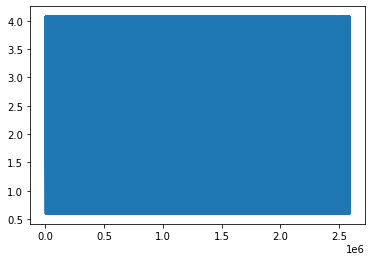

In [82]:
table_set = table_data(df['Current']);

## Creating table data separately

In [83]:
m=[]
h=[]
d=[]

In [84]:
(m,h,d)=table_set

In [85]:
curr_in_mins=pd.Series(m)
curr_in_hrs=pd.Series(h)
curr_in_day=pd.Series(d)

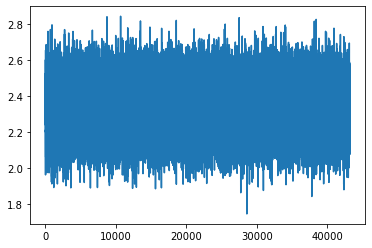

In [86]:
curr_in_mins.plot()

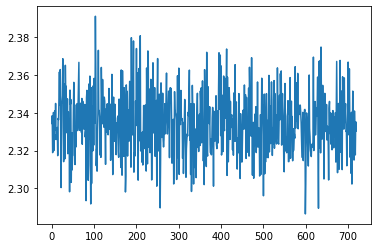

In [87]:
curr_in_hrs.plot()

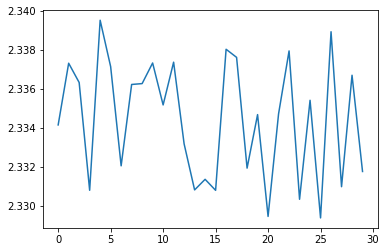

In [88]:
curr_in_day.plot()

In [89]:
curr_in_day.describe()

count    30.000000
mean      2.334454
std       0.003102
min       2.329383
25%       2.331461
50%       2.334943
75%       2.337265
max       2.339511
dtype: float64

In [90]:
max_usg=curr_in_day.idxmax()
min_usg=curr_in_day.idxmin()

In [91]:
print(f'the highest power consumption was on {max_usg+1}th July and minimum consumption was on {min_usg+1}th July')

the highest power consumption was on 5th July and minimum consumption was on 26th July


In [92]:
y=2000
for x in range (1100):
    val=df.iat[y,1]
    rval=random.uniform(2.1,3.1)
    z= val+ rval
    df.loc[y,'Current']=z
    y+=1

In [93]:
import DataCorrection_pkg as dc

786 VALUES CORRECTED!!!


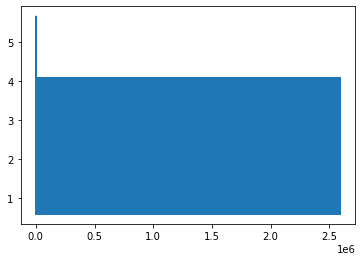

In [94]:
dc.val_correct(df['Current'],df)

# 1 HR DATA SAMPLE

In [95]:
df2=df.head(3600)

# Replicating an appliance 1100 s  ~18 min

In [96]:
y=2000
for x in range (1100):
    val=df.iat[y,1]
    rval=random.uniform(2.1,3.1)
    z= val+ rval
    df2.loc[y,'Current']=z
    y+=1

c:\Users\Faizan\Desktop\sample_project_1\env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-96-13a48411c60b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[y,'Current']=z


c:\Users\Faizan\Desktop\sample_project_1\env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\Users\Faizan\Desktop\sample_project_1\env\lib\site-packages\DataCorrection_pkg\__init__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main.loc[x,'Active_Power1']=val


105 VALUES CORRECTED!!!


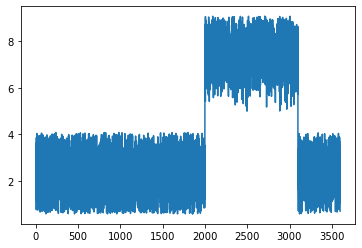

In [97]:
dc.val_correct(df2['Current'],df2)

# 121 VALUES CORRECTED BACK TO ITS OWN VALUES 

# GENERATING 1% ERROR SAMPLES

In [98]:
for x in range (0,36):
    y = random.randint(0,3600)
    z= random.randint(6,13)
    df2.loc[y,'Current']=z

c:\Users\Faizan\Desktop\sample_project_1\env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-98-7f0494fcd8f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[y,'Current']=z


c:\Users\Faizan\Desktop\sample_project_1\env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\Users\Faizan\Desktop\sample_project_1\env\lib\site-packages\DataCorrection_pkg\__init__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main.loc[x,'Active_Power1']=val


15 VALUES CORRECTED!!!


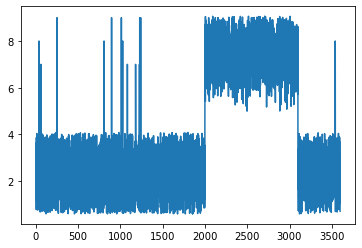

In [99]:
dc.val_correct(df2['Current'],df2)

# 25 VALUES CORRECTED BECAUSE THE LOWER ORDER SPIKES LIES WITHIN THE THE RANGE OF PREVIOUS DEVICE

In [100]:
for x in range (0,36):
    y = random.randint(0,3600)
    z= random.randint(6,10)
    df.loc[y,'Current']=z

c:\Users\Faizan\Desktop\sample_project_1\env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\Users\Faizan\Desktop\sample_project_1\env\lib\site-packages\DataCorrection_pkg\__init__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main.loc[x,'Active_Power1']=val


7 VALUES CORRECTED!!!


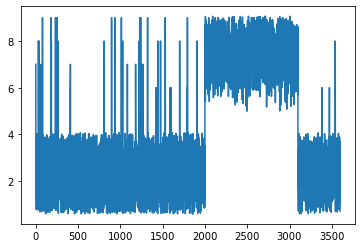

In [101]:
dc.val_correct(df2['Current'],df2)

0 VALUES CORRECTED!!!


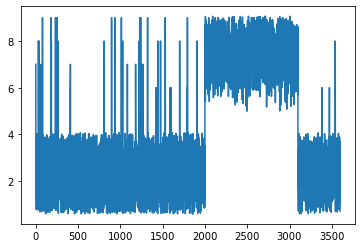

In [102]:
dc.val_correct(df2['Current'],df2)

0 VALUES CORRECTED!!!


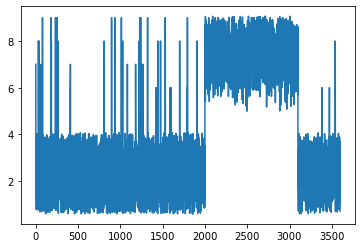

In [103]:
dc.val_correct(df2['Current'],df2)

0 VALUES CORRECTED!!!


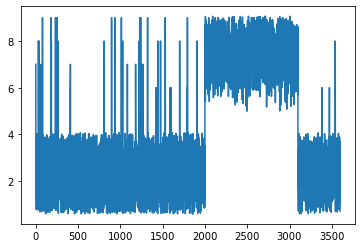

In [104]:
dc.val_correct(df2['Current'],df2)

0 VALUES CORRECTED!!!


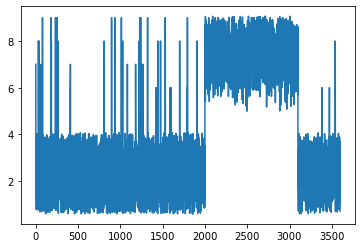

In [105]:
dc.val_correct(df2['Current'],df2)

0 VALUES CORRECTED!!!


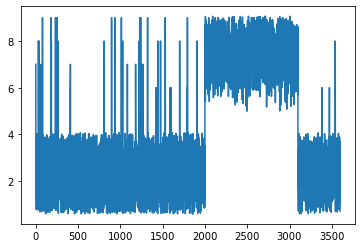

In [106]:
dc.val_correct(df2['Current'],df2)

#  NOW CHECKING THE ACTUAL SAMPLE SPACE, IT CORRECTS ALL 1100 DEVICE SAMPLES,  BUT ALL THESE SAMPLES AVERAGE BACK TO IT SELF

1139 VALUES CORRECTED!!!


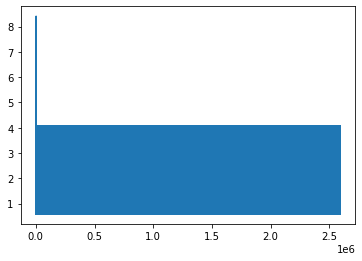

In [107]:
dc.val_correct(df['Current'],df)


(0.5, 9.0)

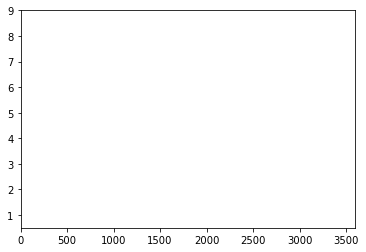

In [109]:
import matplotlib.pyplot as plt
plt.xlim(0,3600)
plt.ylim(0.5,9)

# MORE TESTING WITH DIFFERENT % OF ERRORS

In [110]:
for x in range (0,1000):
    y = random.randint(0,2592000)
    z= random.randint(6,8)
    df.loc[y,'Current']=z
    

2100 VALUES CORRECTED!!!


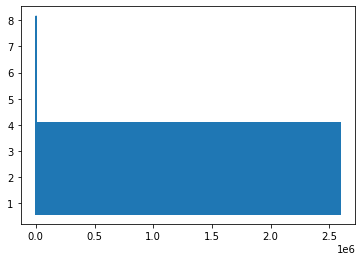

In [111]:
dc.val_correct(df['Current'],df)

In [112]:
for x in range (0,10000):
    y = random.randint(0,2592000)
    z= random.randint(6,8)
    df.loc[y,'Current']=z

11068 VALUES CORRECTED!!!


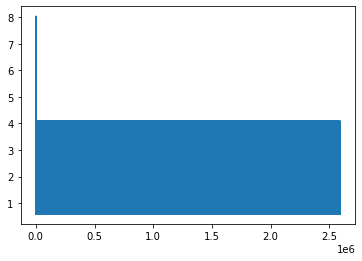

In [113]:
dc.val_correct(df['Current'],df)

In [114]:
for x in range (0,100):
    y = random.randint(0,2592000)
    z= random.randint(6,8)
    df.loc[y,'Current']=z

1197 VALUES CORRECTED!!!


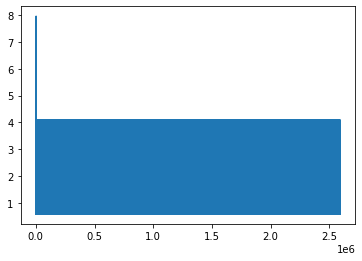

In [115]:
dc.val_correct(df['Current'],df)

In [116]:
for x in range (0,100000):
    y = random.randint(0,2592000)
    z= random.randint(6,8)
    df.loc[y,'Current']=z

99117 VALUES CORRECTED!!!


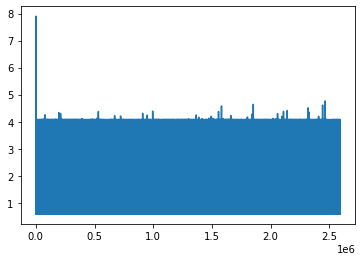

In [117]:
dc.val_correct(df['Current'],df)

In [118]:
for x in range (0,1000000):
    y = random.randint(0,2592000)
    z= random.randint(6,8)
    df.loc[y,'Current']=z

0 VALUES CORRECTED!!!


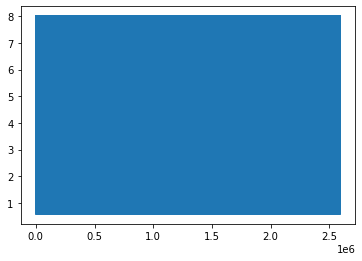

In [119]:
dc.val_correct(df['Current'],df)